# Auto Sales ebay Germany

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('autos_from_kaggle.csv', index_col='Unnamed: 0')

df = df.rename(columns={'ad_created' : 'date_created',
                        'last_seen' : 'last_seen_online'})

data = df.copy()

In [3]:
data

,date_crawled,car_name,price_EUR,ab_test,vehicle_type,registration_year,transmission,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen_online
1,2016-04-02 14:51,Astra_G_Cabrio_Turbo_235_PS,5200,test,cabrio,2002,manuell,235,astra,125000,5,Unknown,opel,nein,2016-04-02 0:00,47652,2016-04-06 13:17
2,2016-03-19 18:36,Fiat_Grande_Punto_1.2_8V__MIT_2_JAHREN_GARANTIE,3400,test,kleinwagen,2006,manuell,65,andere,125000,5,benzin,fiat,nein,2016-03-19 0:00,66538,2016-04-07 7:15
3,2016-03-09 20:59,Volvo_XC60_D5_AWD_Aut.,5200,test,suv,2009,automatik,220,xc_reihe,150000,3,diesel,volvo,ja,2016-03-09 0:00,72762,2016-03-16 5:46
4,2016-03-26 15:55,Kombi_Technisch_super_in_Schuss,750,test,kombi,2000,manuell,112,mondeo,150000,12,benzin,ford,Unknown,2016-03-26 0:00,39446,2016-03-26 15:55
5,2016-03-29 14:47,Audi_A4_1.9_TDI_quattro_Delphingrau,3522,test,limousine,2004,manuell,131,a4,150000,7,diesel,audi,nein,2016-03-29 0:00,51373,2016-03-29 14:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2016-03-13 12:41,Mercedes_Benz_Vaneo_CDI_1.7_Family,3000,test,bus,2002,manuell,91,andere,150000,3,diesel,mercedes_benz,nein,2016-03-13 0:00,96268,2016-04-06 15:17
49995,2016-03-10 0:59,Toyota_RAV_4_2.2D_110_kw,6590,control,suv,2010,manuell,150,rav,150000,6,diesel,toyota,nein,2016-03-09 0:00,66871,2016-03-10 8:42
49996,2016-03-06 17:46,Mercedes_190e_W201,1250,control,limousine,1991,manuell,120,c_klasse,150000,1,benzin,mercedes_benz,nein,2016-03-06 0:00,25560,2016-04-06 6:16
49997,2016-03-09 0:56,Peugeot_Boxer_HDi_335_L2H2_verglast,12500,test,bus,2011,manuell,120,andere,125000,6,diesel,peugeot,nein,2016-03-09 0:00,69123,2016-03-11 12:17


## EDA

### Numerical feature

**Числовые признаки**

*price_EUR: Указанная цена автомобиля в евро (тарет)*

registration_year: Год первой регистрации автомобиля

power_ps: Мощность автомобиля в лошадиных силах (PS, Pferdestärke)

odometer_km: Пробег автомобиля в километрах (приблизительно)

registration_month: Месяц первой регистрации автомобиля

postal_code: Почтовый индекс места нахождения автомобиля

In [4]:
date_columns = ['date_crawled', 'date_created', 'last_seen_online']
for col in date_columns:
    data[col] = pd.to_datetime(data[col]).dt.normalize()

data['registration_date'] = pd.to_datetime(
    data['registration_year'].astype(str) + '-' +
    data['registration_month'].astype(str) + '-01'
)

data = data.drop(['registration_year', 'registration_month'], axis=1)

In [5]:
# auto_age - возраст автомобиля, дата регистрации минус дата выставления объявления
data['auto_age_years'] = (data['date_created'] - data['registration_date']).dt.days / 365

# days_online - сколько дней объявление висело на сайте
data['days_online'] = (data['last_seen_online'] - data['date_created']).dt.days

In [6]:
data

,date_crawled,car_name,price_EUR,ab_test,vehicle_type,transmission,power_ps,model,odometer_km,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen_online,registration_date,auto_age_years,days_online
1,2016-04-02,Astra_G_Cabrio_Turbo_235_PS,5200,test,cabrio,manuell,235,astra,125000,Unknown,opel,nein,2016-04-02,47652,2016-04-06,2002-05-01,13.931507,4
2,2016-03-19,Fiat_Grande_Punto_1.2_8V__MIT_2_JAHREN_GARANTIE,3400,test,kleinwagen,manuell,65,andere,125000,benzin,fiat,nein,2016-03-19,66538,2016-04-07,2006-05-01,9.890411,19
3,2016-03-09,Volvo_XC60_D5_AWD_Aut.,5200,test,suv,automatik,220,xc_reihe,150000,diesel,volvo,ja,2016-03-09,72762,2016-03-16,2009-03-01,7.027397,7
4,2016-03-26,Kombi_Technisch_super_in_Schuss,750,test,kombi,manuell,112,mondeo,150000,benzin,ford,Unknown,2016-03-26,39446,2016-03-26,2000-12-01,15.326027,0
5,2016-03-29,Audi_A4_1.9_TDI_quattro_Delphingrau,3522,test,limousine,manuell,131,a4,150000,diesel,audi,nein,2016-03-29,51373,2016-03-29,2004-07-01,11.750685,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2016-03-13,Mercedes_Benz_Vaneo_CDI_1.7_Family,3000,test,bus,manuell,91,andere,150000,diesel,mercedes_benz,nein,2016-03-13,96268,2016-04-06,2002-03-01,14.043836,24
49995,2016-03-10,Toyota_RAV_4_2.2D_110_kw,6590,control,suv,manuell,150,rav,150000,diesel,toyota,nein,2016-03-09,66871,2016-03-10,2010-06-01,5.775342,1
49996,2016-03-06,Mercedes_190e_W201,1250,control,limousine,manuell,120,c_klasse,150000,benzin,mercedes_benz,nein,2016-03-06,25560,2016-04-06,1991-01-01,25.194521,31
49997,2016-03-09,Peugeot_Boxer_HDi_335_L2H2_verglast,12500,test,bus,manuell,120,andere,125000,diesel,peugeot,nein,2016-03-09,69123,2016-03-11,2011-06-01,4.775342,2


In [7]:
data.describe()

,date_crawled,price_EUR,power_ps,odometer_km,date_created,postal_code,last_seen_online,registration_date,auto_age_years,days_online
count,37866,37866.000000,37866.000000,37866.000000,37866,37866.000000,37866,37866,37866.000000,37866.000000
mean,2016-03-20 22:26:54.324195584,6838.213595,129.625363,124270.717794,2016-03-20 20:30:13.975597824,51743.524613,2016-03-30 00:35:12.882269184,2003-12-23 22:37:49.180795520,12.249072,9.170126
min,2016-03-05 00:00:00,500.000000,1.000000,5000.000000,2015-11-10 00:00:00,1067.000000,2016-03-05 00:00:00,1929-04-01 00:00:00,-0.739726,0.000000
25%,2016-03-13 00:00:00,1700.000000,86.000000,100000.000000,2016-03-13 00:00:00,31368.000000,2016-03-24 00:00:00,2000-03-01 00:00:00,7.761644,2.000000
50%,2016-03-21 00:00:00,3950.000000,116.000000,150000.000000,2016-03-21 00:00:00,50998.000000,2016-04-04 00:00:00,2004-06-01 00:00:00,11.819178,6.000000
75%,2016-03-29 00:00:00,8500.000000,156.000000,150000.000000,2016-03-29 00:00:00,72469.000000,2016-04-06 00:00:00,2008-07-01 00:00:00,16.049315,14.000000
max,2016-04-07 00:00:00,820000.000000,1403.000000,150000.000000,2016-04-07 00:00:00,99998.000000,2016-04-07 00:00:00,2016-12-01 00:00:00,87.002740,149.000000
std,NaN,11615.915258,64.633507,39764.869422,NaN,25656.493782,NaN,NaN,6.735499,8.565072


In [8]:
numeric_cols = data.select_dtypes('number')

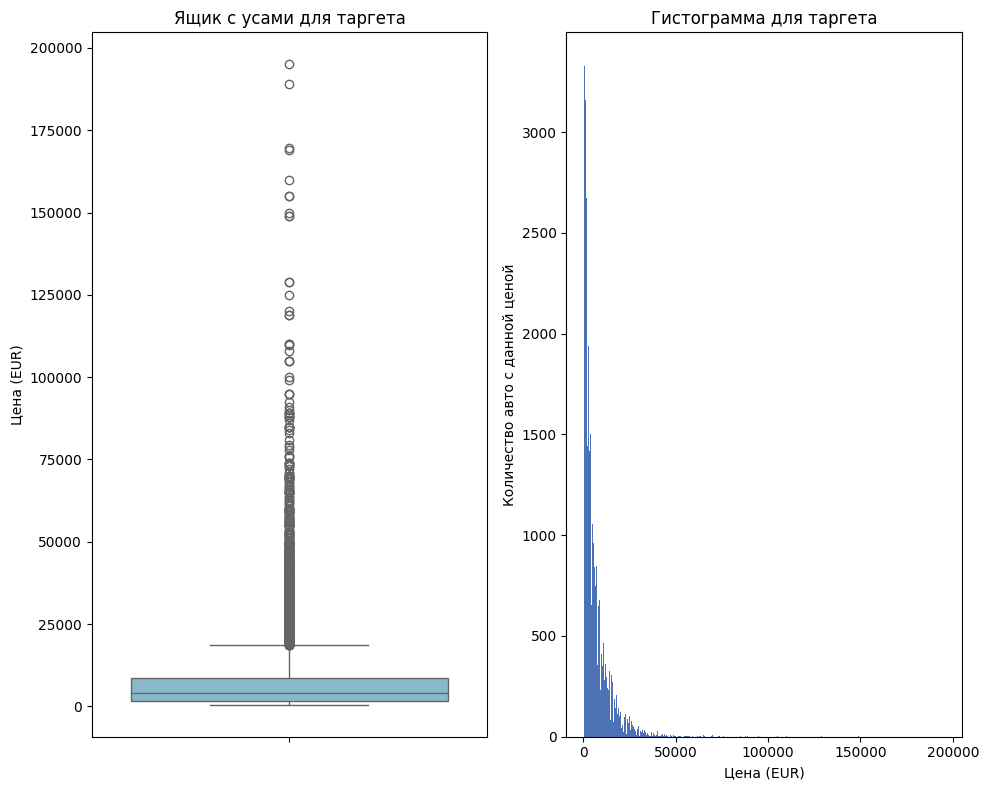

In [9]:
# Распределение таргета

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(data[data['price_EUR'] < 200000]['price_EUR'], color='#7EBED3')
plt.ylabel("Цена (EUR)")
plt.title('Ящик с усами для таргета')

ax2 = fig.add_subplot(1, 2, 2)
plt.hist(data[data['price_EUR'] < 200000]['price_EUR'], bins=500, color='#4D71B5')
plt.xticks(range(0, 200001, 50000))
plt.xlabel("Цена (EUR)")
plt.ylabel("Количество авто с данной ценой")
plt.title('Гистограмма для таргета')

fig.tight_layout()
plt.show()

In [10]:
# Уберем выбросы

data = data[data['price_EUR'] < 200000]
data = data[data['auto_age_years'] > 0]
data.shape

(37412, 18)

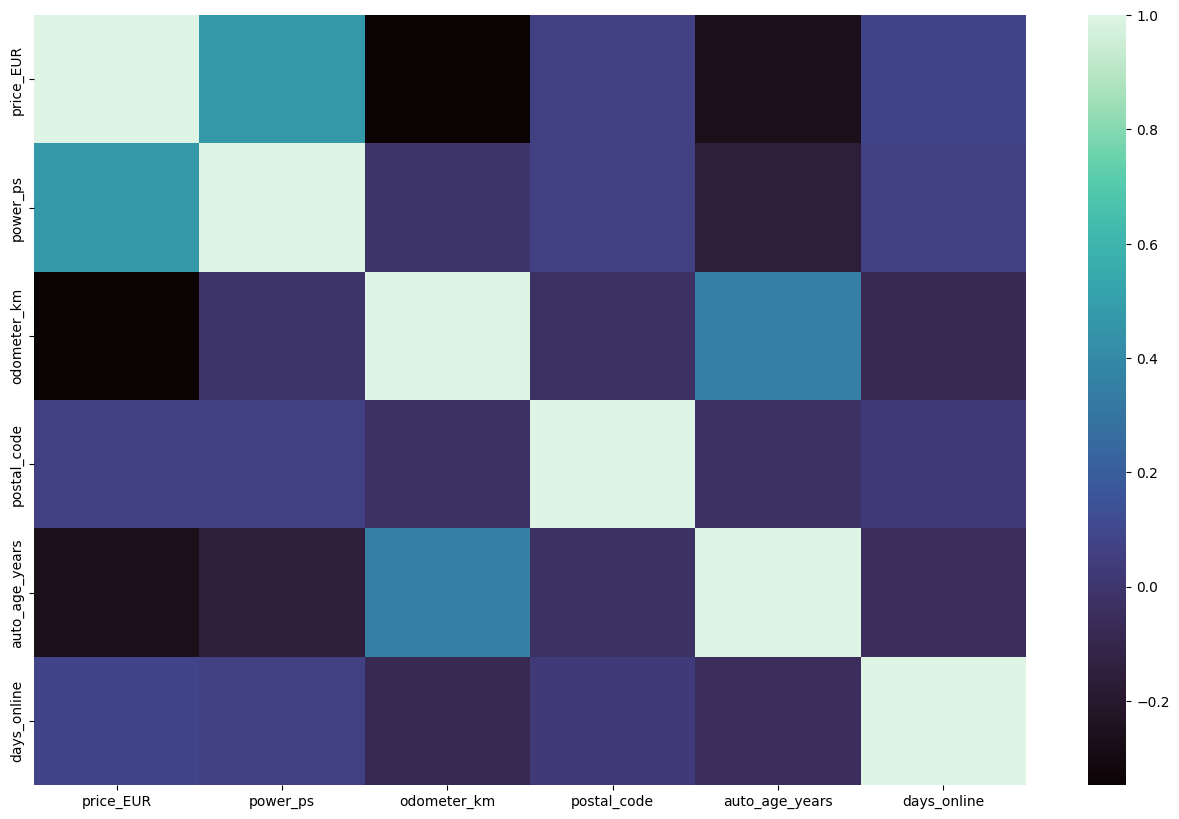

In [11]:
# Тепловая карта корреляций

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.heatmap(numeric_cols.corr(), cmap='mako')
plt.show()

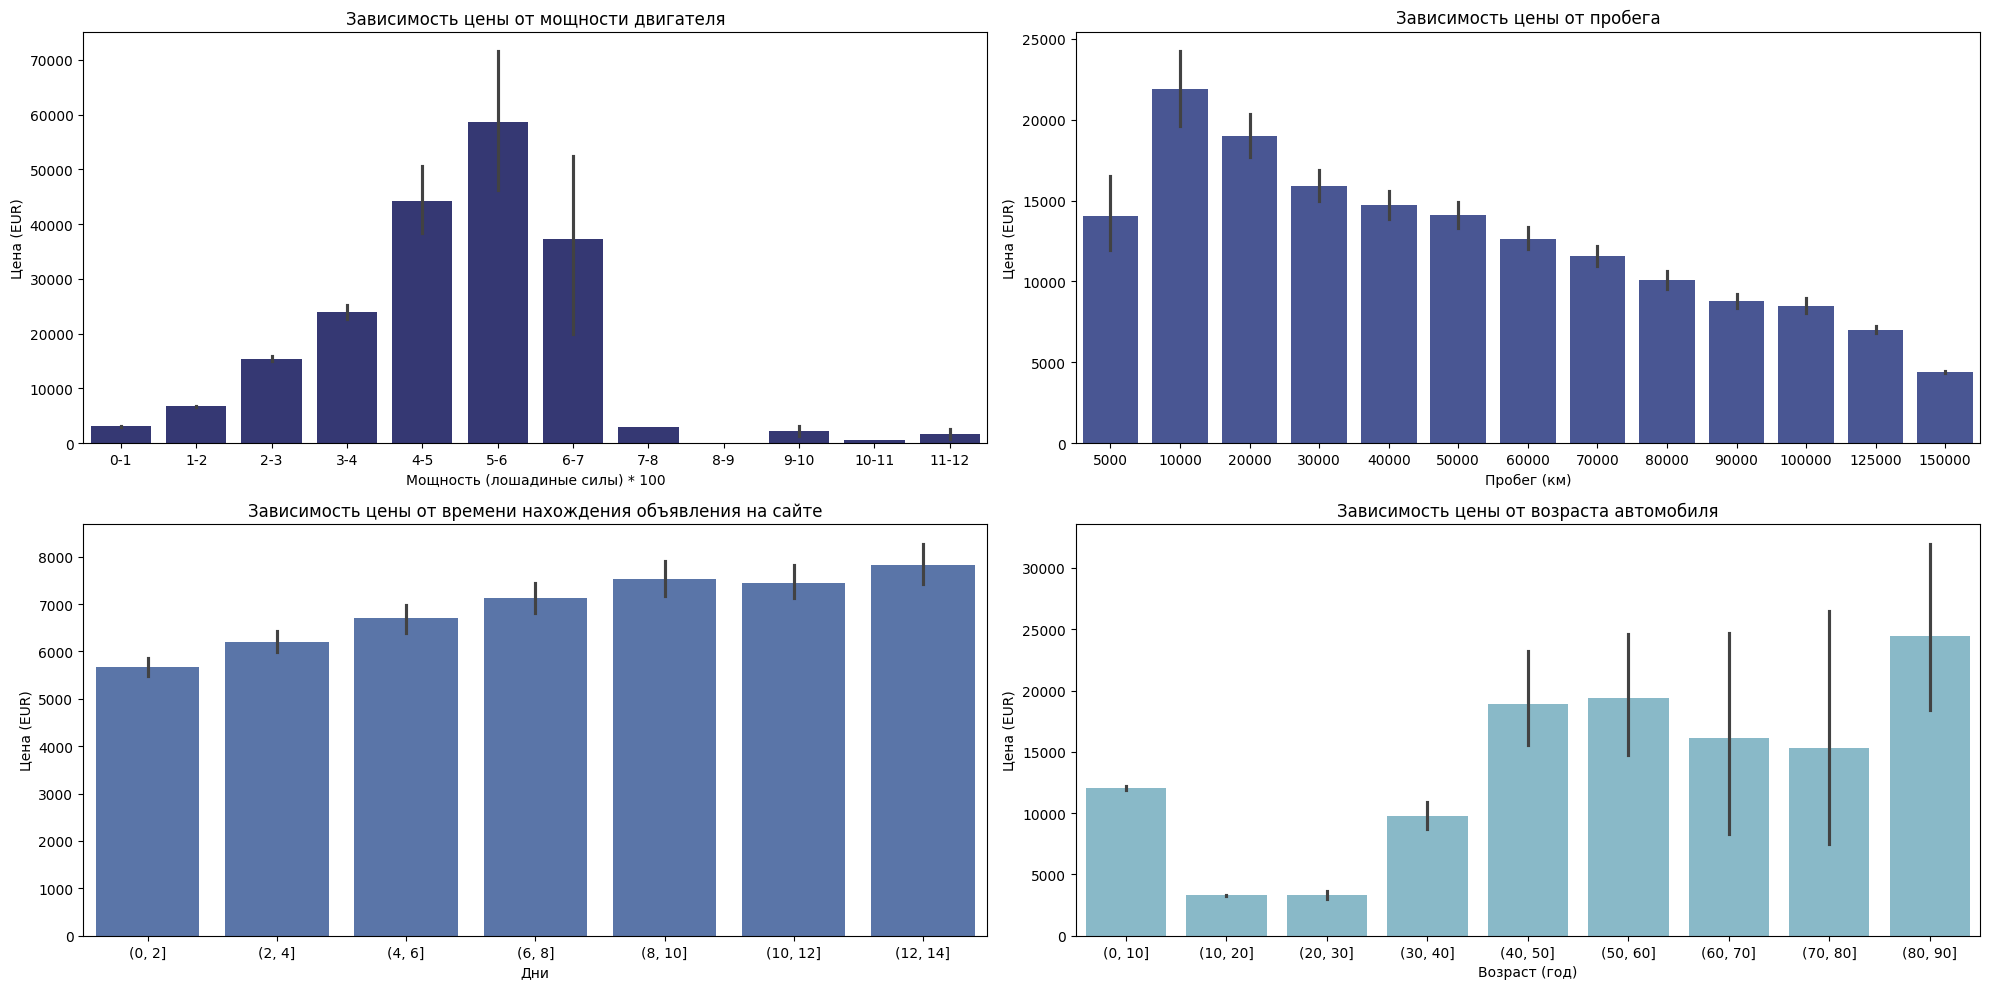

In [12]:
# Столбчатые диаграммы для числовых признаков

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(2, 2, 1)
power_groups = pd.cut(data['power_ps'], bins=[i for i in range(0, 1201, 100)],
                      labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7',
                              '7-8', '8-9', '9-10', '10-11', '11-12'])
sns.barplot(x=power_groups, y='price_EUR', data=data, color='#2B2F7D')
plt.title("Зависимость цены от мощности двигателя")
plt.xlabel("Мощность (лошадиные силы) * 100")
plt.ylabel("Цена (EUR)")

ax2 = fig.add_subplot(2, 2, 2)
sns.barplot(x='odometer_km', y='price_EUR', data=data, color='#3C4EA0')
plt.title("Зависимость цены от пробега")
plt.xlabel("Пробег (км)")
plt.ylabel("Цена (EUR)")

ax3 = fig.add_subplot(2, 2, 3)
days_online_groups = pd.cut(data['days_online'],
                            bins=[0, 2, 4, 6, 8, 10, 12, 14])
sns.barplot(x=days_online_groups, y='price_EUR', data=data, color='#4D71B5')
plt.title("Зависимость цены от времени нахождения объявления на сайте")
plt.xlabel("Дни")
plt.ylabel("Цена (EUR)")

ax4 = fig.add_subplot(2, 2, 4)
age_groups = pd.cut(data['auto_age_years'], bins=[i for i in range(0, 91, 10)])
sns.barplot(x=age_groups, y='price_EUR', data=data, color='#7EBED3')
plt.title("Зависимость цены от возраста автомобиля")
plt.xlabel("Возраст (год)")
plt.ylabel("Цена (EUR)")

fig.tight_layout()
plt.show()

**Дата (год, месяц, день)**

date_crawled: Дата, когда объявление было впервые обнаружено краулером; все значения полей соответствуют этой дате

date_created: Дата создания объявления на eBay

last_seen_online: Дата, когда объявление было в последний раз доступно онлайн

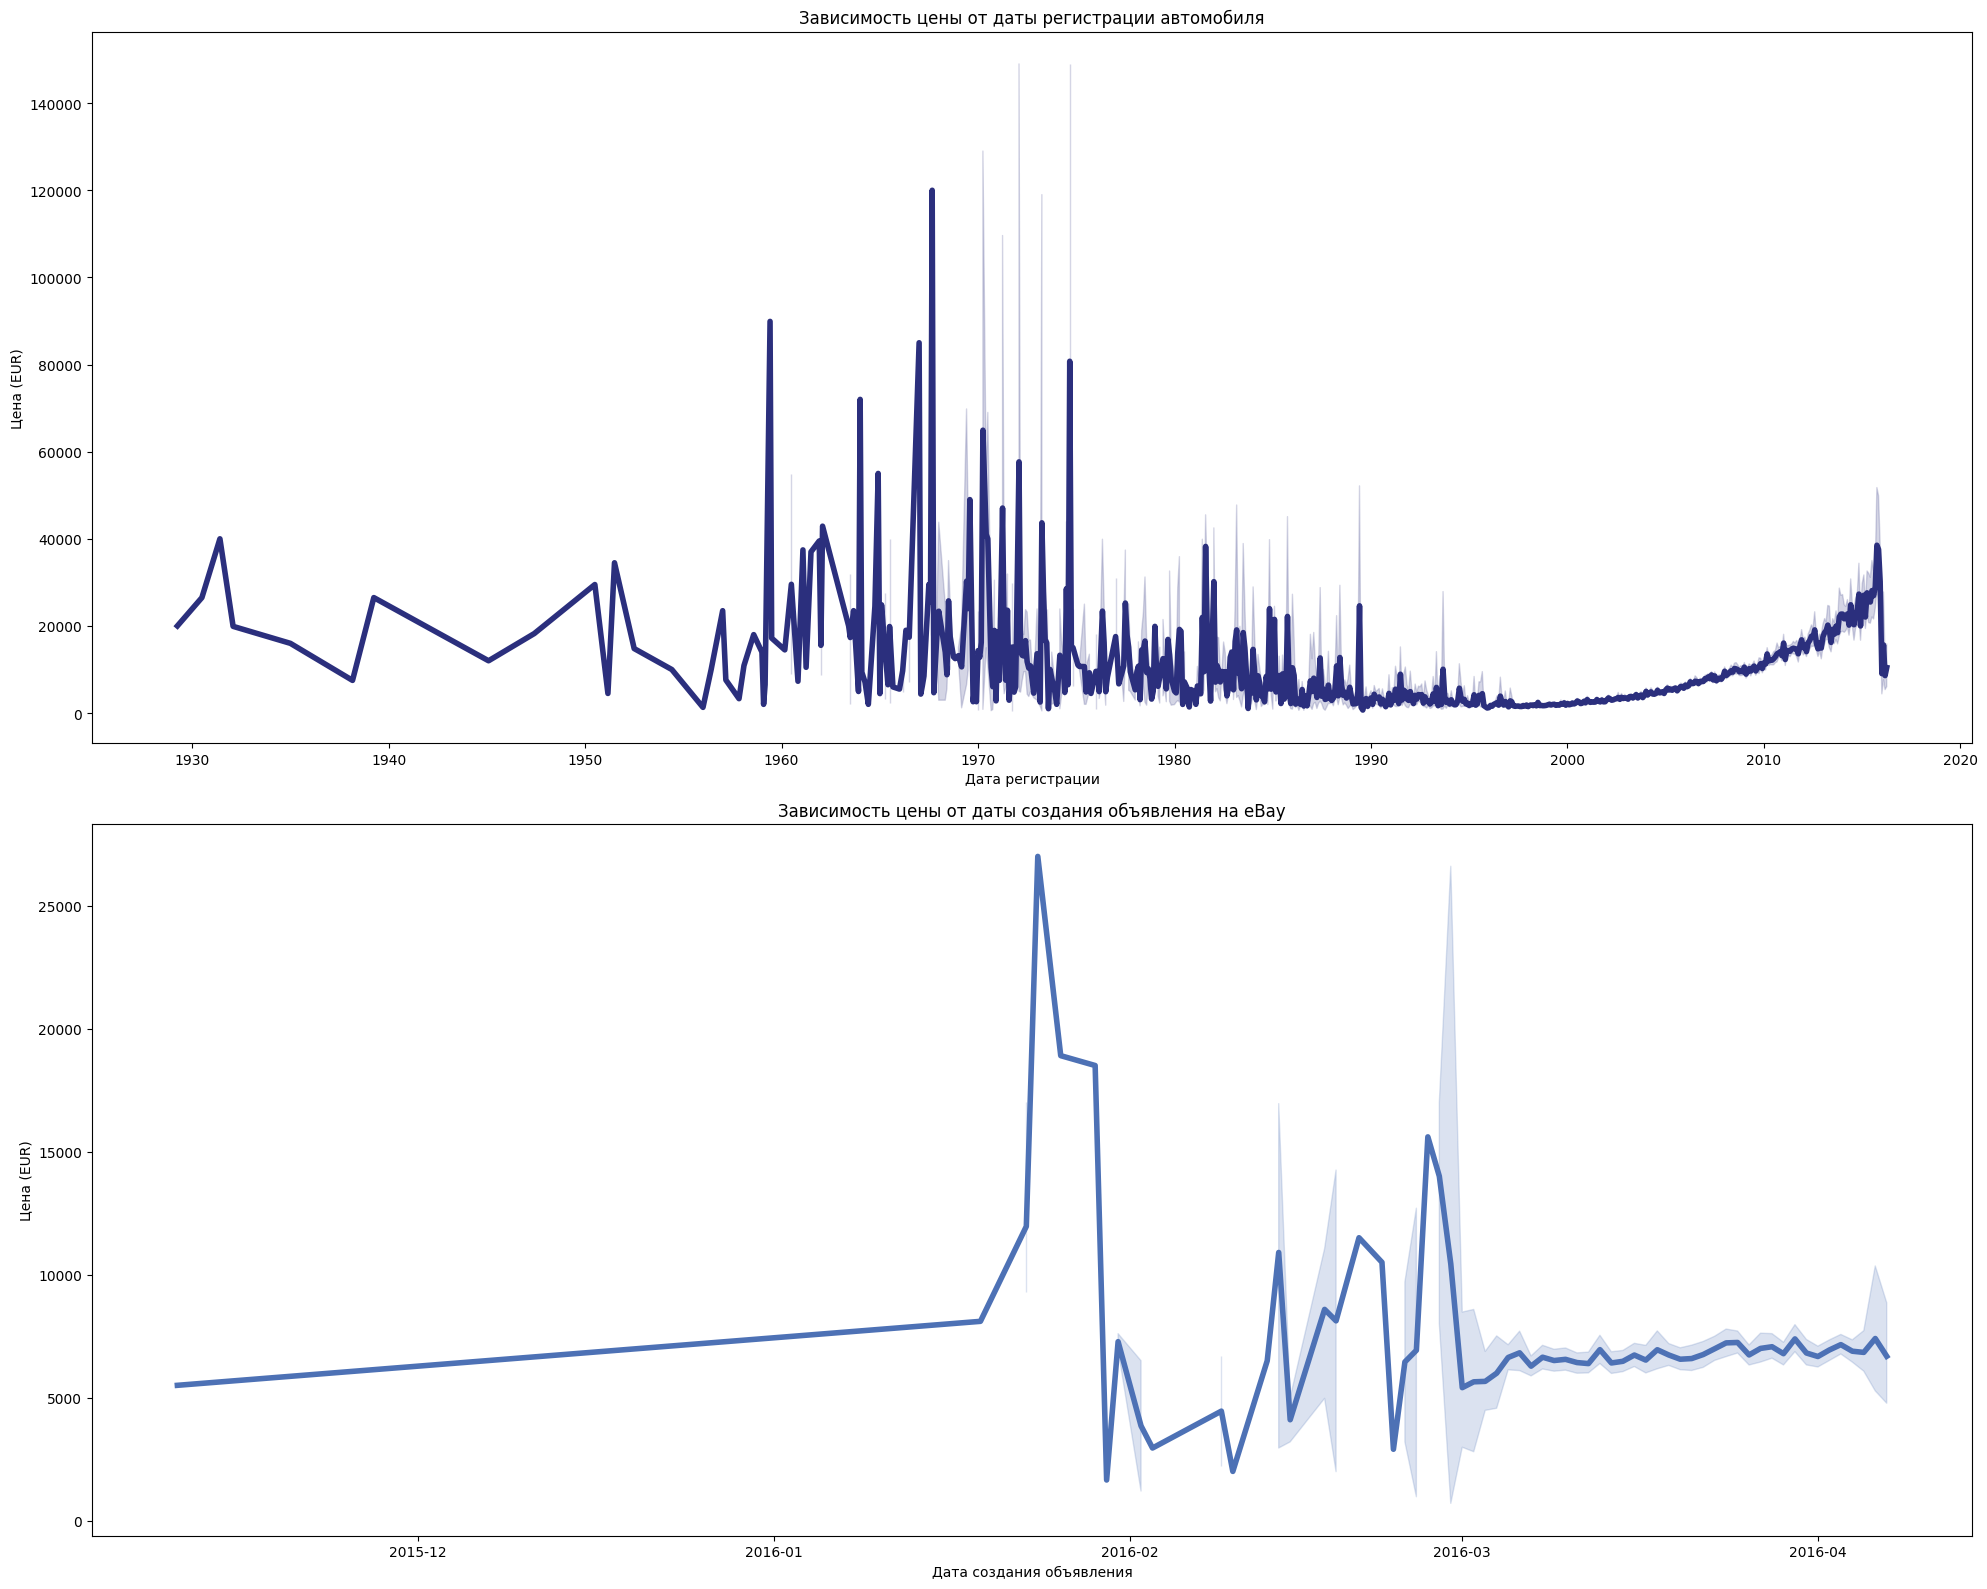

In [13]:
# Зависимости цен от даты

fig = plt.figure(figsize=(20, 16))

ax1 = fig.add_subplot(2, 1, 1)
sns.lineplot(data=data.sort_values(by='registration_date'),
             x='registration_date', y='price_EUR',
             color='#2B2F7D', linewidth=4)
plt.title("Зависимость цены от даты регистрации автомобиля")
plt.xlabel("Дата регистрации")
plt.ylabel("Цена (EUR)")

ax2 = fig.add_subplot(2, 1, 2)
sns.lineplot(data=data.sort_values(by='date_created'),
             x='date_created', y='price_EUR',
             color='#4D71B5', linewidth=4)
plt.title("Зависимость цены от даты создания объявления на eBay")
plt.xlabel("Дата создания объявления")
plt.ylabel("Цена (EUR)")

fig.tight_layout()
plt.show()

### Categorial features

In [14]:
data.describe(include='object')

,car_name,ab_test,vehicle_type,transmission,model,fuel_type,brand,unrepaired_damage
count,37412,37412,37412,37412,37412,37412,37412,37412
unique,27968,2,9,3,244,8,40,3
top,BMW_318i,test,limousine,manuell,golf,benzin,volkswagen,nein
freq,92,19481,11044,28129,3055,23246,7950,30648


**Описание категориальных признаков:**

car_name: Название автомобиля

ab_test: Участвует ли объявление в A/B-тестировании

vehicle_type: Тип транспортного средства (например, седан, внедорожник)

transmission: Тип коробки передач (например, механическая, автоматическая)

model: Модель автомобиля

fuel_type: Тип топлива (например, бензин, дизель, электродвигатель)

brand: Марка автомобиля

unrepaired_damage: Наличие неисправленных повреждений у автомобиля

In [15]:
category_cols = data.select_dtypes('object')

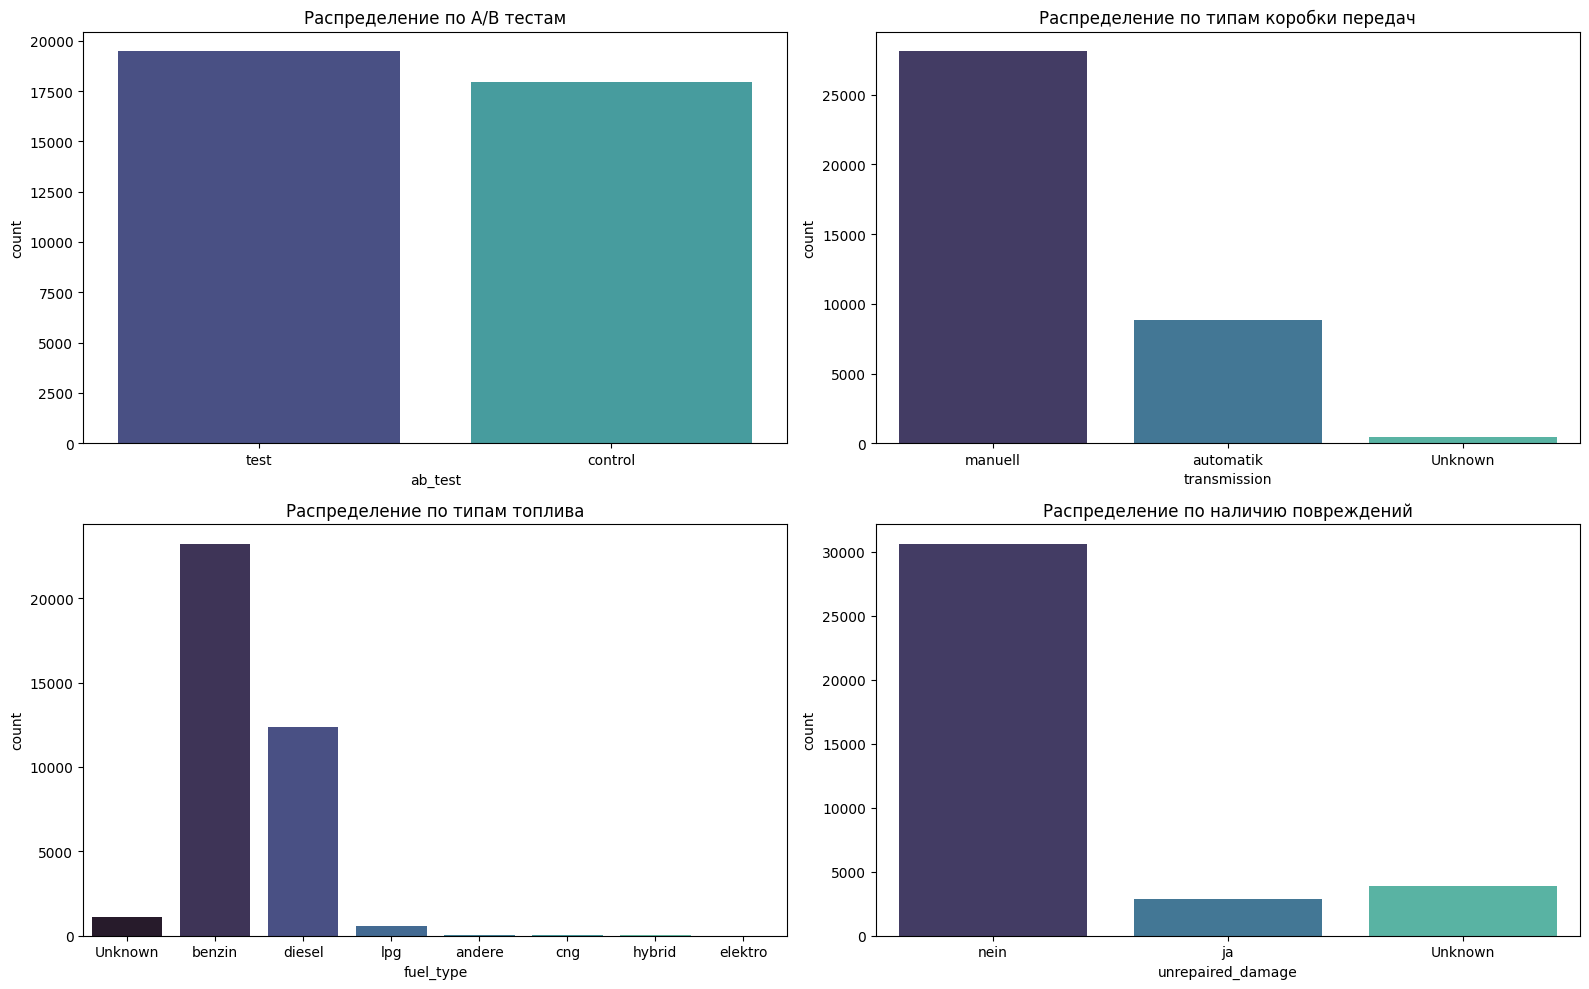

In [16]:
# Распределение количества наблюдений по категориям

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.countplot(x='ab_test', data=data, ax=axes[0,0],
              hue='ab_test', palette='mako')
axes[0,0].set_title('Распределение по A/B тестам')

sns.countplot(x='transmission', data=data, ax=axes[0,1],
              hue='transmission', palette='mako')
axes[0,1].set_title('Распределение по типам коробки передач')

sns.countplot(x='fuel_type', data=data, ax=axes[1,0],
              hue='fuel_type', palette='mako')
axes[1,0].set_title('Распределение по типам топлива')

sns.countplot(x='unrepaired_damage', data=data, ax=axes[1,1],
              hue='unrepaired_damage', palette='mako')
axes[1,1].set_title('Распределение по наличию повреждений')

plt.tight_layout()
plt.show()

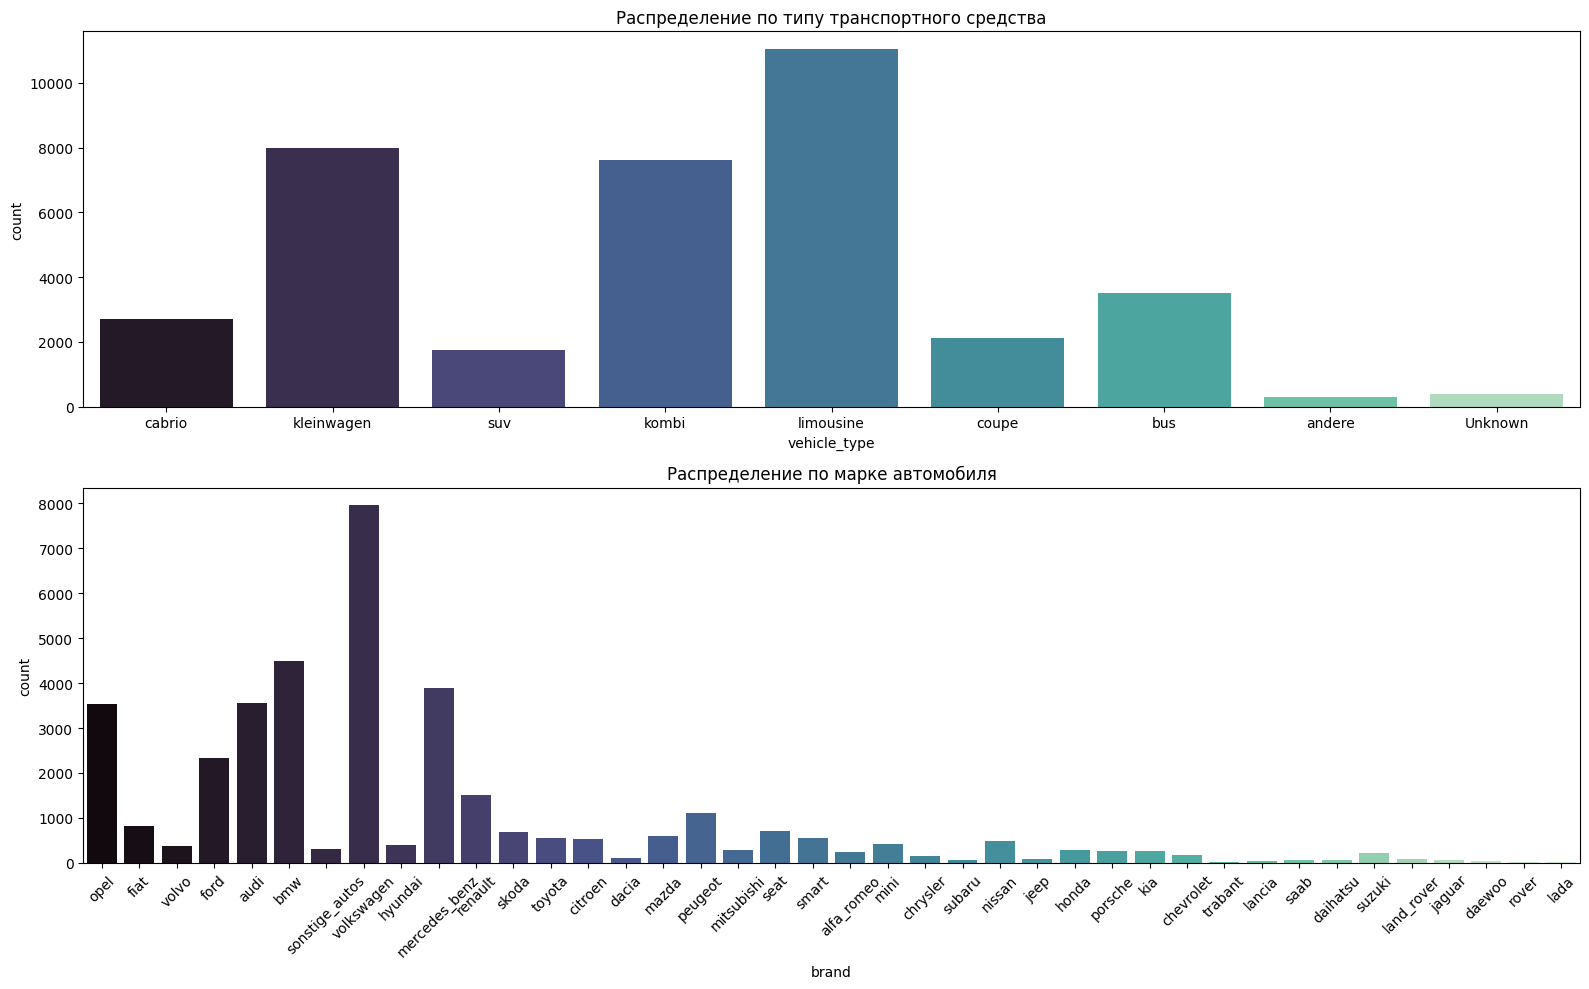

In [17]:
# Распределение количества наблюдений по категориям

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

sns.countplot(x='vehicle_type', data=data, ax=axes[0],
              hue='vehicle_type', palette='mako')
axes[0].set_title('Распределение по типу транспортного средства')

sns.countplot(x='brand', data=data, ax=axes[1],
              hue='brand', palette='mako')
axes[1].tick_params(axis='x', rotation=45, labelrotation=45)
axes[1].set_title('Распределение по марке автомобиля')

plt.tight_layout()
plt.show()

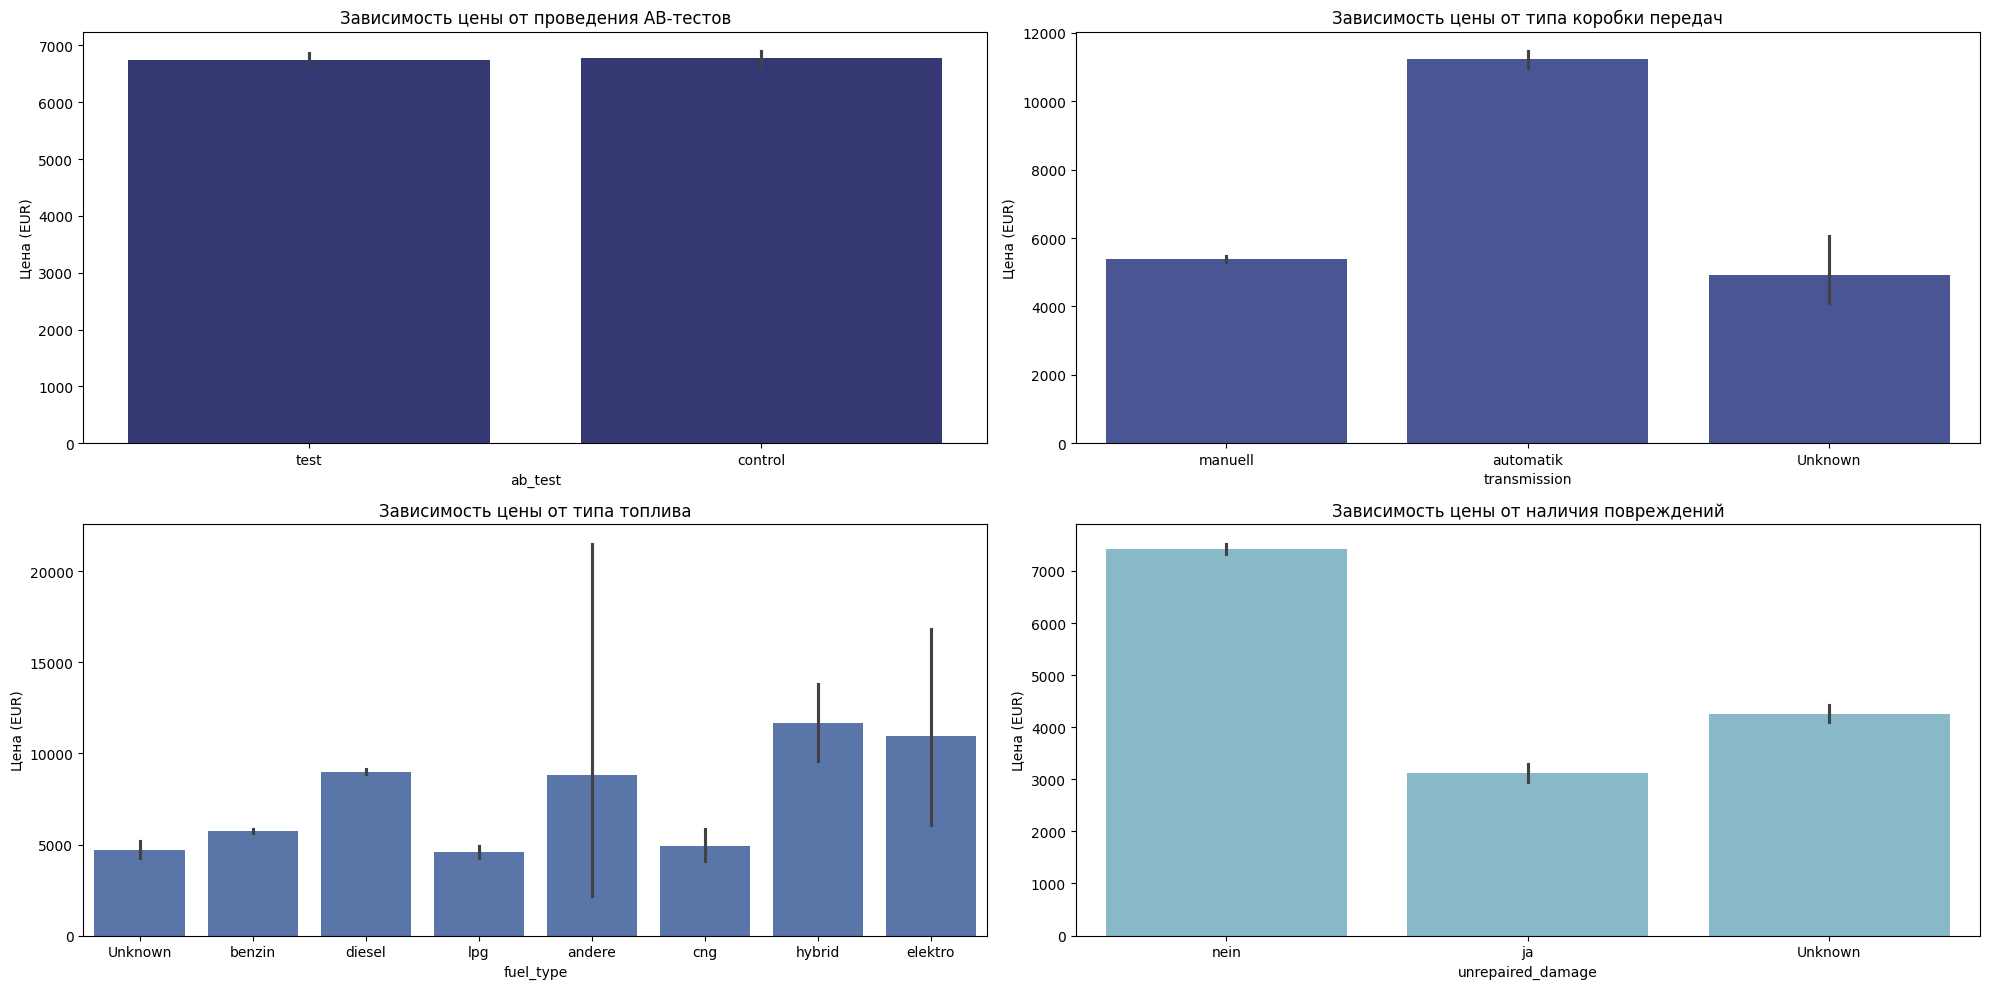

In [18]:
# Столбчатые диаграммы для категориальных признаков

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(2, 2, 1)
sns.barplot(x='ab_test', y='price_EUR', data=data, color='#2B2F7D')
plt.title("Зависимость цены от проведения АВ-тестов")
plt.ylabel("Цена (EUR)")

ax2 = fig.add_subplot(2, 2, 2)
sns.barplot(x='transmission', y='price_EUR', data=data, color='#3C4EA0')
plt.title("Зависимость цены от типа коробки передач")
plt.ylabel("Цена (EUR)")

ax3 = fig.add_subplot(2, 2, 3)
sns.barplot(x='fuel_type', y='price_EUR', data=data, color='#4D71B5')
plt.title("Зависимость цены от типа топлива")
plt.ylabel("Цена (EUR)")

ax4 = fig.add_subplot(2, 2, 4)
sns.barplot(x='unrepaired_damage', y='price_EUR', data=data, color='#7EBED3')
plt.title("Зависимость цены от наличия повреждений")
plt.ylabel("Цена (EUR)")

fig.tight_layout()
plt.show()

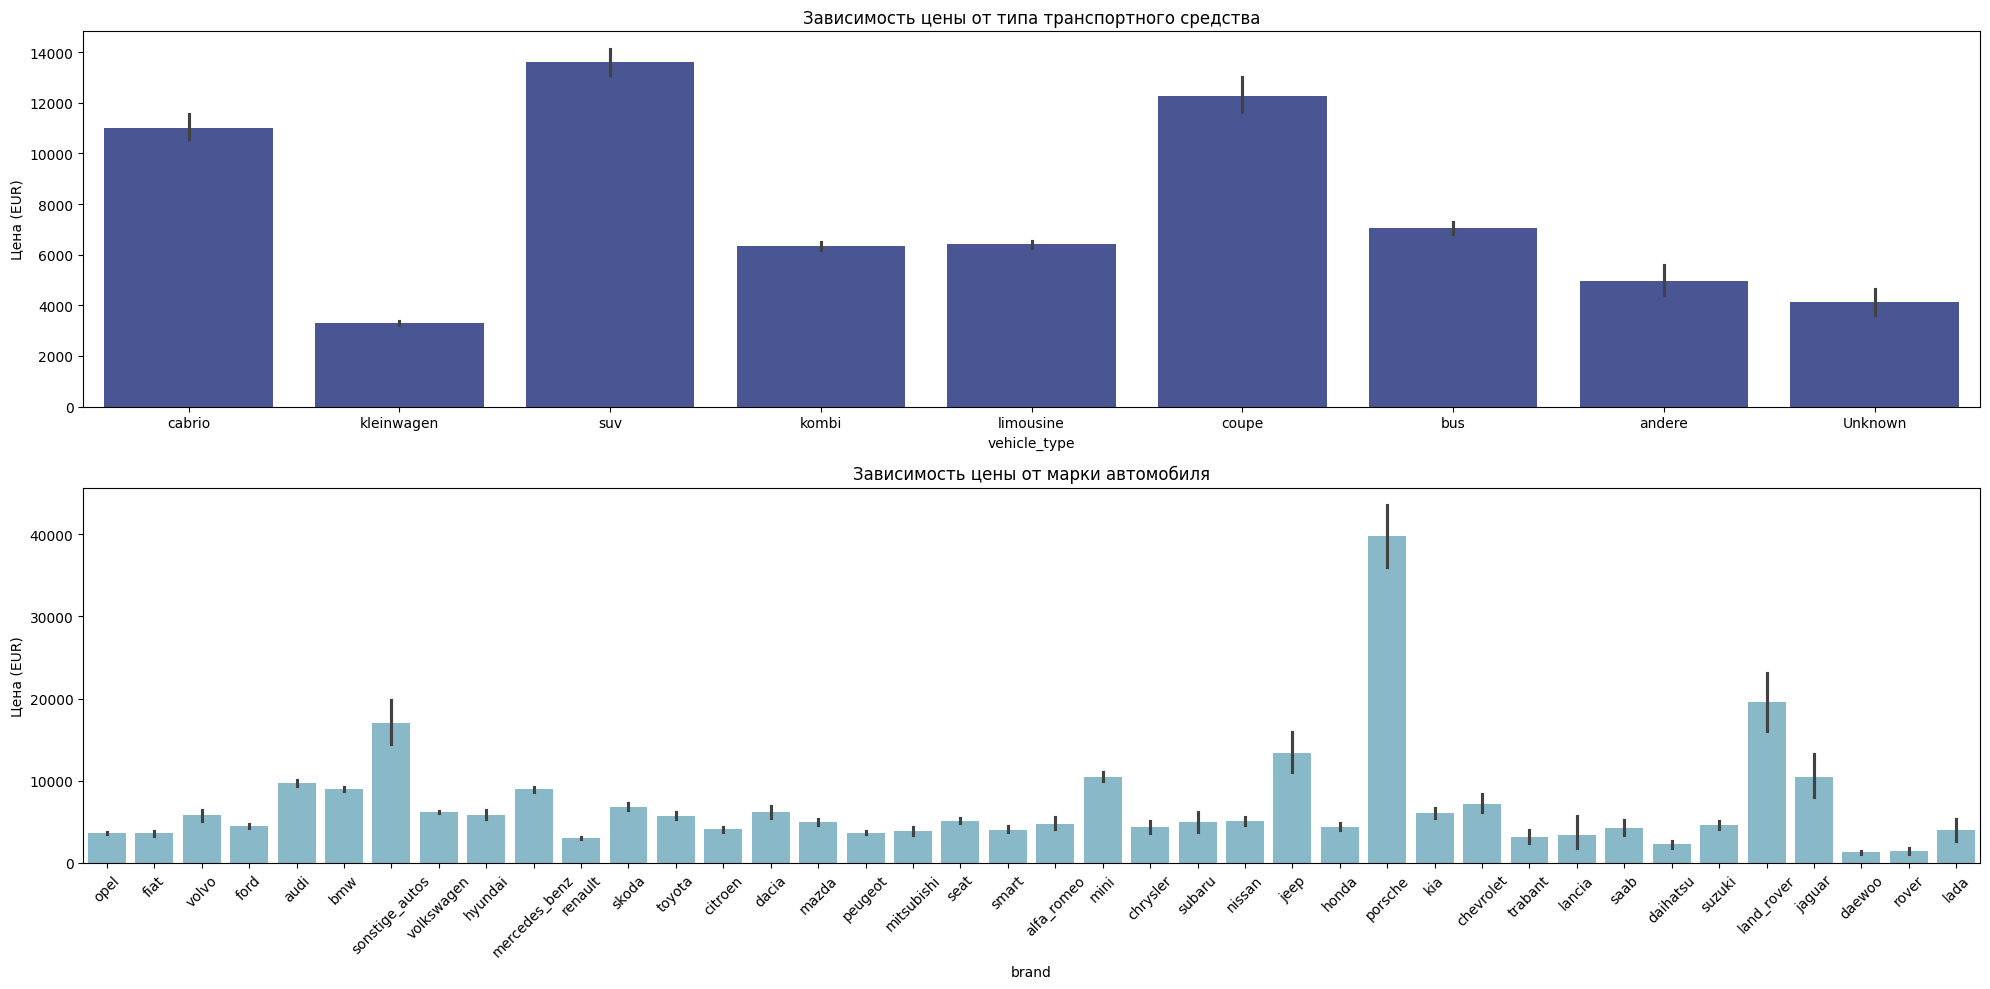

In [19]:
# Столбчатые диаграммы для категориальных признаков

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(2, 1, 1)
sns.barplot(x='vehicle_type', y='price_EUR', data=data, color='#3C4EA0')
plt.title("Зависимость цены от типа транспортного средства")
plt.ylabel("Цена (EUR)")

ax2 = fig.add_subplot(2, 1, 2)
sns.barplot(x='brand', y='price_EUR', data=data, color='#7EBED3')
plt.xticks(rotation=45)
plt.title("Зависимость цены от марки автомобиля")
plt.ylabel("Цена (EUR)")

fig.tight_layout()
plt.show()

## PROCESSING

In [20]:
data

,date_crawled,car_name,price_EUR,ab_test,vehicle_type,transmission,power_ps,model,odometer_km,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen_online,registration_date,auto_age_years,days_online
1,2016-04-02,Astra_G_Cabrio_Turbo_235_PS,5200,test,cabrio,manuell,235,astra,125000,Unknown,opel,nein,2016-04-02,47652,2016-04-06,2002-05-01,13.931507,4
2,2016-03-19,Fiat_Grande_Punto_1.2_8V__MIT_2_JAHREN_GARANTIE,3400,test,kleinwagen,manuell,65,andere,125000,benzin,fiat,nein,2016-03-19,66538,2016-04-07,2006-05-01,9.890411,19
3,2016-03-09,Volvo_XC60_D5_AWD_Aut.,5200,test,suv,automatik,220,xc_reihe,150000,diesel,volvo,ja,2016-03-09,72762,2016-03-16,2009-03-01,7.027397,7
4,2016-03-26,Kombi_Technisch_super_in_Schuss,750,test,kombi,manuell,112,mondeo,150000,benzin,ford,Unknown,2016-03-26,39446,2016-03-26,2000-12-01,15.326027,0
5,2016-03-29,Audi_A4_1.9_TDI_quattro_Delphingrau,3522,test,limousine,manuell,131,a4,150000,diesel,audi,nein,2016-03-29,51373,2016-03-29,2004-07-01,11.750685,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2016-03-13,Mercedes_Benz_Vaneo_CDI_1.7_Family,3000,test,bus,manuell,91,andere,150000,diesel,mercedes_benz,nein,2016-03-13,96268,2016-04-06,2002-03-01,14.043836,24
49995,2016-03-10,Toyota_RAV_4_2.2D_110_kw,6590,control,suv,manuell,150,rav,150000,diesel,toyota,nein,2016-03-09,66871,2016-03-10,2010-06-01,5.775342,1
49996,2016-03-06,Mercedes_190e_W201,1250,control,limousine,manuell,120,c_klasse,150000,benzin,mercedes_benz,nein,2016-03-06,25560,2016-04-06,1991-01-01,25.194521,31
49997,2016-03-09,Peugeot_Boxer_HDi_335_L2H2_verglast,12500,test,bus,manuell,120,andere,125000,diesel,peugeot,nein,2016-03-09,69123,2016-03-11,2011-06-01,4.775342,2


In [21]:
# Из колонки car_name извлекаем только ее длину

data['name_length'] = df['car_name'].str.len()

In [22]:
# Ненужные колонки убираем

data = data.drop(['car_name', 'ab_test', 'date_crawled', 'date_created',
                  'last_seen_online', 'registration_date'], axis=1)

category_cols = category_cols.drop(['car_name', 'ab_test'], axis=1)

In [23]:
data['price_EUR'] = np.log1p(data['price_EUR'])

In [24]:
for col in category_cols:
  if len(data[col].value_counts()) < 10:
    encoded_col = pd.get_dummies(data[col], drop_first=True, prefix=col, dtype='int')
    data = pd.concat([data, encoded_col], axis=1).drop(col, axis=1)
  else:
    data[col] = df.groupby(col)['price_EUR'].transform('mean')

data

,price_EUR,power_ps,model,odometer_km,brand,postal_code,auto_age_years,days_online,name_length,vehicle_type_andere,...,transmission_manuell,fuel_type_andere,fuel_type_benzin,fuel_type_cng,fuel_type_diesel,fuel_type_elektro,fuel_type_hybrid,fuel_type_lpg,unrepaired_damage_ja,unrepaired_damage_nein
1,8.556606,235,3758.139423,125000,3610.639545,47652,13.931507,4,27,0,...,1,0,0,0,0,0,0,0,0,1
2,8.131825,65,8038.471670,125000,3564.425837,66538,9.890411,19,47,0,...,1,0,1,0,0,0,0,0,0,1
3,8.556606,220,14800.780488,150000,5811.663130,72762,7.027397,7,22,0,...,0,0,0,0,1,0,0,0,1,0
4,6.621406,112,3311.289552,150000,4461.713559,39446,15.326027,0,31,0,...,1,0,1,0,0,0,0,0,0,0
5,8.167068,131,7041.169991,150000,9682.079409,51373,11.750685,0,35,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,8.006701,91,8038.471670,150000,9043.509022,96268,14.043836,24,34,0,...,1,0,0,0,1,0,0,0,0,1
49995,8.793460,150,8652.458333,150000,5712.789474,66871,5.775342,1,24,0,...,1,0,0,0,1,0,0,0,0,1
49996,7.131699,120,7714.161491,150000,9043.509022,25560,25.194521,31,18,0,...,1,0,1,0,0,0,0,0,0,1
49997,9.433564,120,8038.471670,125000,3676.327160,69123,4.775342,2,35,0,...,1,0,0,0,1,0,0,0,0,1


## CUSTOM TRANSFORMER FOR FEATURE PROCESSING

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
import itertools

In [26]:
''' Класс для кодирования категориальных признаков '''

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):

  def __init__(self, object_columns, target_name):
    self.object_columns = object_columns
    self.target_name = target_name

  def fit(self, X, Y):
    X_fit = X.copy()
    Y_fit = Y.copy()

    self.numeric_columns = [x for x in X_fit.columns if x not in self.object_columns]

    X_with_target = pd.concat((X_fit, Y_fit), axis=1)

    # Сгенерим колонки, к которым применим One-Hot-Encoding
    self.cols_for_ohe = [col for col in self.object_columns
                         if
                         X_with_target[col].nunique() <= 10]

    # Сгенерим колонки, к которым применим Mean-Target-Encoding
    self.cols_for_mte = [col for col in self.object_columns
                         if
                         X_with_target[col].nunique() > 10]

    # Посчитаем на валидации средние значения таргета
    self.dict_of_means = {col : X_with_target.groupby(col)[self.target_name].mean()
                          for col in self.cols_for_mte}

    # Запомним все ohe колонки и их названия
    self.ohe_names = {col : sorted([f"{col}_{value}"
                      for value in X_with_target[col].unique()])
                      for col in self.cols_for_ohe}

    return self

  def transform(self, X, Y=None):
    X_ = X.copy()

    # One-Hot-Encoding
    data_part = pd.get_dummies(X_[self.cols_for_ohe],
                               prefix=self.cols_for_ohe)
    data_part_cols = data_part.columns
    X_ = X_.drop(self.cols_for_ohe, axis=1)
    X_ = pd.concat((X_, data_part), axis=1)

    # Mean-Target-Encoding
    for col in self.cols_for_mte:
      X_[col] = X_[col].map(self.dict_of_means[col])
      mean_value = self.dict_of_means[col].values.mean()
      X_[col] = X_[col].fillna(mean_value)

    # Сформируем полный список всех ожидаемых колонок
    expected_columns = (
      self.numeric_columns +
      list(itertools.chain(*self.ohe_names.values())) +
      self.cols_for_mte
    )

    # Проверим отсутствующие колонки (добавим нули)
    missing_columns = [col for col in expected_columns if col not in X_.columns]
    if missing_columns:
      zeros = np.zeros((X_.shape[0], len(missing_columns)))
      X_[missing_columns] = zeros

    # Проверим лишние колонки (удалим)
    extra_columns = [col for col in X_.columns if col not in expected_columns]
    if extra_columns:
      X_ = X_.drop(extra_columns, axis=1)

    return X_[expected_columns]

In [27]:
'''Класс для автоматической обработки дат '''

class AutoFeatureTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, target_name='price_EUR'):
    self.target_name = target_name
    self.date_columns_ = ['date_crawled', 'date_created', 'last_seen_online']
    self.drop_columns_ = ['car_name', 'ab_test', 'date_crawled', 'date_created',
                          'last_seen_online', 'registration_date', 'price_EUR']
  def fit(self, X, Y=None):
    return self

  def transform(self, X):
    X_transformed = X.copy()

    # Преобразование колонок к типу datetime
    for col in self.date_columns_:
      X_transformed[col] = pd.to_datetime(X_transformed[col]).dt.normalize()

    # Создание registration_date - исправлено преобразование чисел в целые
    X_transformed['registration_date'] = pd.to_datetime(
      X_transformed['registration_year'].astype(int).astype(str) + '-' +
      X_transformed['registration_month'].astype(int).astype(str) + '-01'
    )

    # Создание новых фичей
    X_transformed['auto_age_years'] = (X_transformed['date_created'] -
                                       X_transformed['registration_date']).dt.days / 365
    X_transformed['days_online'] = (X_transformed['last_seen_online'] -
                                    X_transformed['date_created']).dt.days

    # Обработка текстовых полей
    X_transformed['name_length'] = X_transformed['car_name'].str.len()

    # Удаление ненужных колонок
    cols_to_drop = [col for col in self.drop_columns_ if col in X_transformed.columns]
    X_transformed = X_transformed.drop(cols_to_drop, axis=1)

    return X_transformed

## TRAINING

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [29]:
X = data.drop('price_EUR', axis=1)
Y = np.log1p(data['price_EUR'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    shuffle=True, random_state=42)

In [30]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
print(np.mean((model.predict(x_train) - y_train) ** 2) ** (1/2))
print(np.mean((model.predict(x_test) - y_test) ** 2) ** (1/2))

2.123440975496715e-06
0.05894598602574712


In [31]:
raw_X = df.drop('price_EUR', axis=1)
raw_Y = np.log1p(df['price_EUR'])

raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(raw_X, raw_Y,
                                                                    test_size=0.2,
                                                                    shuffle=True,
                                                                    random_state=42)

In [32]:
pipe = Pipeline([
    ('auto_preprocessor', AutoFeatureTransformer(target_name='price_EUR')),
    ('custom_transformer', CustomFunctionTransformer(
        object_columns=category_cols,
        target_name='price_EUR'
    )),
    ('model', DecisionTreeRegressor())
])

pipe.fit(raw_x_train, raw_y_train)

print(np.mean((pipe.predict(raw_x_train) - raw_y_train) ** 2) ** (1/2))
print(np.mean((pipe.predict(raw_x_test) - raw_y_test) ** 2) ** (1/2))

2.1437147096816507e-05
0.5206395259085549


Разница в качестве может оказаться из-за того, что приподготовке данных data были удалены выбросы, в отличие от данных df. Помимо того, при обработке data могла произойти утечка данных, так как значения для MTE были расчитаны на всем датасете, а не только на обучающей выборке

In [33]:
param_grid = {
    "model__max_depth": [5, 10, 15],
    "model__min_samples_split": [10, 200, 50000],
    "model__min_impurity_decrease": [0, 0.1],
    "model__max_leaf_nodes": [100, 1000]
}

search = GridSearchCV(pipe, param_grid, cv=3,
                      scoring='neg_root_mean_squared_error')

search.fit(raw_x_train, raw_y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

print(f"Качество лучшей модели на финальном тесте: {search.score(raw_x_test, raw_y_test)}")

Best parameter (CV score=-0.46275):
{'model__max_depth': 15, 'model__max_leaf_nodes': 1000, 'model__min_impurity_decrease': 0, 'model__min_samples_split': 200}
Качество лучшей модели на финальном тесте: -0.4343974272331157


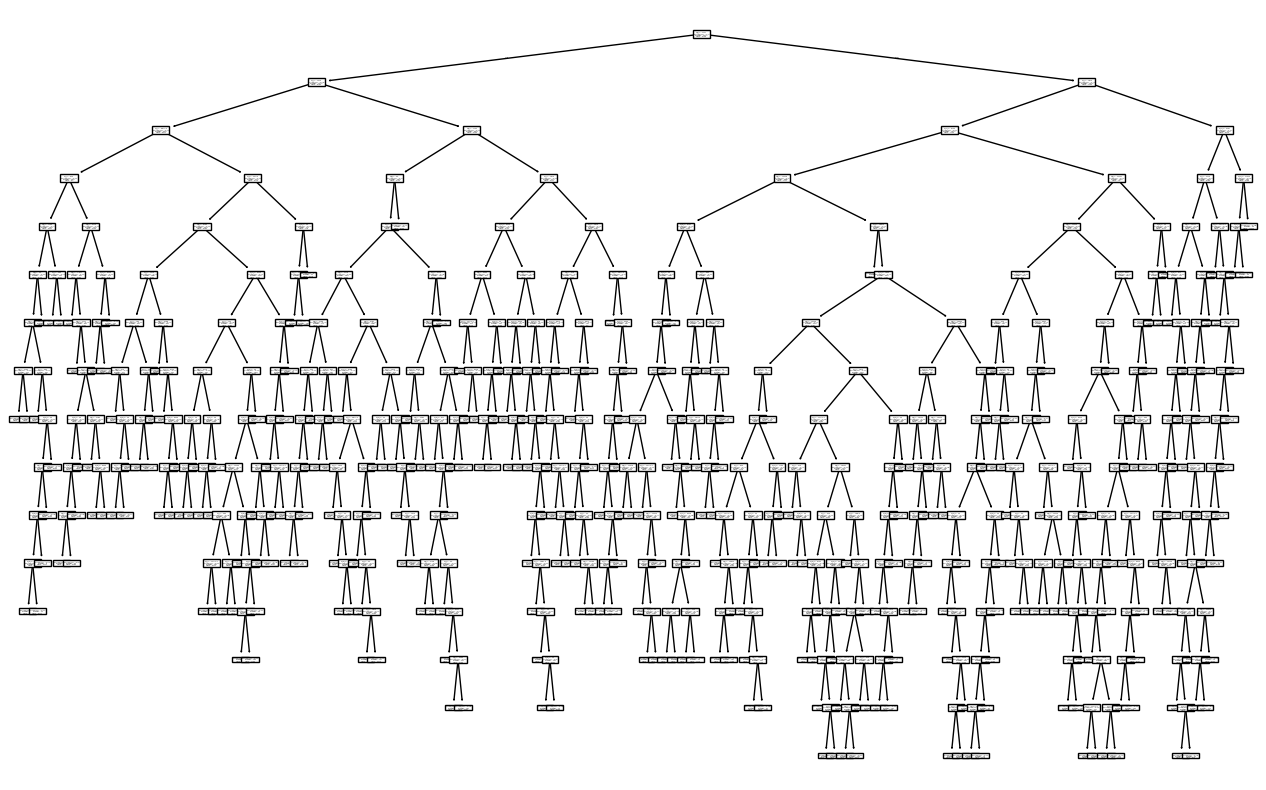

In [34]:
# Дерево в виде графа

fig = plt.figure(figsize=(16, 10))
tree.plot_tree(search.best_estimator_['model'])

plt.show()